# **Student Performance in Exam Analysis**

## **Project Overview**

This analysis assesses student exam performance using a variety of demographic and socioeconomic parameters. By examining the dataset, we hope to learn more about how gender, race/ethnicity, parental education level, lunch type, and test preparation affect students' math, reading, and writing scores.

The findings will assist in identifying crucial elements influencing academic achievement, which can then be used to inform educational practices and policies to improve student outcomes.

The dataset provides information on student exam performance. The critical user attributes or data elements that will be evaluated are:


1. Gender: Male or female. Gender analysis can provide insights into performance variations and preferences between male and female students, allowing for more individualized educational tactics and support services.
2.	Race/Ethnicity: This categorical variable represents the student's race/ethnicity. Understanding racial and cultural backgrounds can assist in detecting educational discrepancies and inspire policies that promote equity and inclusion.
3.	Parental Level of Education: This pertains to the highest level of education achieved by the student's parents. This statistic can shed light on the impact of parental education on student achievement, emphasizing the need for focused interventions.
4.	Lunch: The meal the student received (regular, free, or reduced). Lunch kinds can disclose socioeconomic aspects that influence student achievement and guide resource allocation to help students from low-income homes.
5.	Test Preparation Course: Indicates whether or not the student completed a test preparation course. Tracking the completion of test preparation courses can determine their effectiveness in improving student performance and informing educational program selections.
6.	Math Score: A student's math exam score. This statistic is critical for evaluating students’ math proficiency, finding areas for development, and customizing math training approaches.
7.	Reading Score: A student's reading exam score. Analyzing reading scores assists in understanding students’ literacy levels, guiding reading programs, and developing targeted reading interventions.
8.	Writing Score: The student's score on the writing exam. This score provides information about students' writing ability, which informs writing training strategies and identifies the need for more writing support.

The primary goals of this project are to better understand demographic and socioeconomic determinants by examining how gender, race/ethnicity, parental education, lunch style, and test preparation courses affect exam results. The project also aims to identify performance trends by comparing trends across demographic groups and creating a model to predict student performance using the provided attributes.

This analysis is expected to provide insights into performance disparities among different gender and race/ethnicity groups, understanding how parents' educational level correlates with student performance, analyzing how receiving standard or free/reduced lunch and completing a course for test preparation affect exam scores, and predictions about future student performance to help identify at-risk students and provide targeted support.


## **Libraries and Data Handling**

### Importing Libraries

In [ ]:
# Data Manipulation and Plotting
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Inferential Statistics
from scipy.stats import ttest_ind
import statsmodels.api as sm

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

### Importing Datasets

In [ ]:
df = pd.read_csv('14_Student Performance in Exam Analysis.csv')

## **Data Analysis Techniques**

### Preliminary Analysis (Descriptive Analysis)

In [ ]:
# Returns the first 5 rows of the DataFrame by default.
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Returns the last 5 rows of the DataFrame by default.
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
# Returns a tuple representing the dimensionality of the DataFrame.
# The first element is the number of rows, and the second is the number of columns.
df.shape

(1000, 8)

In [ ]:
# Generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
# Returns the column labels of the DataFrame.
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
# Returns the data types of each column in the DataFrame.
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [ ]:
# Returns the number of missing values in each column.
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
# Prints a concise summary of the DataFrame, including the index dtype and column dtypes, non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# Returns the number of unique values in each column.
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### Inferential Statistics

In [ ]:
# Define numeric and categorical columns
numeric_columns = df.select_dtypes(exclude="object").columns.tolist()
categorical_columns = df.select_dtypes(include="object").columns.tolist()

# T-test for binary categorical variables
for num_col in numeric_columns:
    for cat_col in categorical_columns:
        unique_values = df[cat_col].unique()
        if len(unique_values) == 2:
            group1 = df[df[cat_col] == unique_values[0]][num_col]
            group2 = df[df[cat_col] == unique_values[1]][num_col]
            t_stat, p_value = ttest_ind(group1, group2)
            print(f'Numeric Column: {num_col}, Categorical Column: {cat_col}')
            print(f'T-statistic: {t_stat}, P-value: {p_value}')
            if p_value < 0.05:
                print(f"Reject the null hypothesis: There is a significant difference in {num_col} between {unique_values[0]} and {unique_values[1]}.\n")
            else:
                print(f"Fail to reject the null hypothesis: There is no significant difference in {num_col} between {unique_values[0]} and {unique_values[1]}.\n")

            print('\n' + '-' * 67 + '\n')

Numeric Column: math score, Categorical Column: gender
T-statistic: -5.383245869828983, P-value: 9.120185549328822e-08
Reject the null hypothesis: There is a significant difference in math score between female and male.


-------------------------------------------------------------------

Numeric Column: math score, Categorical Column: lunch
T-statistic: 11.837180472914612, P-value: 2.4131955993137074e-30
Reject the null hypothesis: There is a significant difference in math score between standard and free/reduced.


-------------------------------------------------------------------

Numeric Column: math score, Categorical Column: test preparation course
T-statistic: -5.704616417349102, P-value: 1.5359134607147415e-08
Reject the null hypothesis: There is a significant difference in math score between none and completed.


-------------------------------------------------------------------

Numeric Column: reading score, Categorical Column: gender
T-statistic: 7.959308005187657, P-valu

### Predictive Model (using Linear Regression)

In [ ]:
# Define features (X) and target (y)
# These variables will be used in all machine learning models belor
# Edit the column_name for other analysis
X = df.drop(['writing score'], axis=1)
y = df['writing score']

# Define numeric and categorical columns
numeric_columns = X.select_dtypes(exclude="object").columns.tolist()
categorical_columns = X.select_dtypes(include="object").columns.tolist()

# Preprocessing: OneHotEncoder for categorical columns and StandardScaler for numeric columns
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, categorical_columns),
        ("StandardScaler", numeric_transformer, numeric_columns),
    ])

# Apply preprocessing to features
X = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Display the shapes of training and testing sets
print("\nTRAIN-TEST SPLIT: \n")

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

print('\n' + '-' * 67 + '\n')

print("PREDICTIONS: \n")

print("y_train_pred: \n\n", y_train_pred)
print()
print("y_test_pred: \n\n", y_test_pred)

print('\n' + '-' * 67 + '\n')

mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("EVALUATIONS: \n")
print("MSE: ", mse)
print("R2: ", r2)


TRAIN-TEST SPLIT: 

Training set shape: (800, 19)
Testing set shape: (200, 19)

-------------------------------------------------------------------

PREDICTIONS: 

y_train_pred: 

 [ 71.9375  83.9375  87.625   62.5625  59.5     22.1875 104.0625  76.125
  64.8125  56.      59.375   63.      63.25    68.4375  66.625   37.75
  65.5625  57.5625  88.      82.5     62.4375  56.375   81.125   80.875
  27.1875  94.75    68.      64.125   79.6875  57.375   71.5625  57.0625
  60.3125  49.6875  39.875   65.625   41.375   76.25    63.6875  76.5625
  49.5625  43.5     95.5625  56.875   86.75    66.      61.5625  78.1875
  37.25    83.125   47.125   79.75    64.5     61.25    60.8125  51.3125
  77.5625  97.25    63.8125  80.0625  43.375   86.75    72.125   74.5
  64.0625  72.125   56.875   84.6875  60.3125  94.0625  79.      61.5625
  82.      46.6875  55.3125  53.875   64.125   54.25    41.4375  62.9375
  61.      78.6875  76.6875  67.8125  27.875  100.      88.6875  70.625
  48.9375  71.5625  75.

## **Visual Insights**

Text(0, 0.5, 'Count')

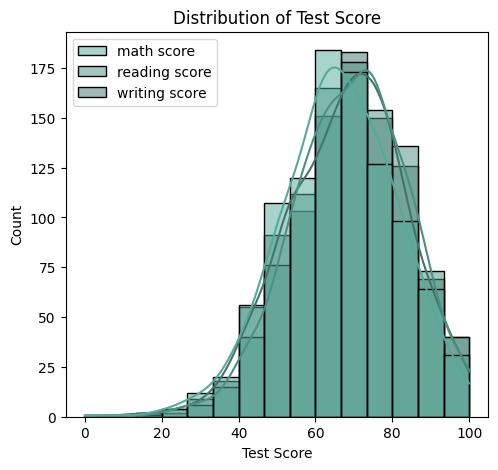

In [ ]:
# Plot | Creates a figure
plt.figure(figsize = (12, 5)) # Size of the figure

# Subplot
plt.subplot(1, 2, 1)
sns.histplot(df[numeric_columns],
             bins = 15,
             kde = True)

plt.title('Distribution of Test Score')
plt.xlabel('Test Score')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

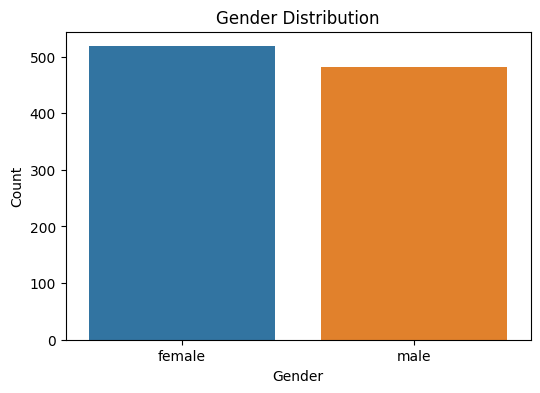

In [ ]:
# Gender Figure
plt.figure(figsize = (6, 4))
sns.countplot(data = df,
              x = 'gender',
              hue = 'gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

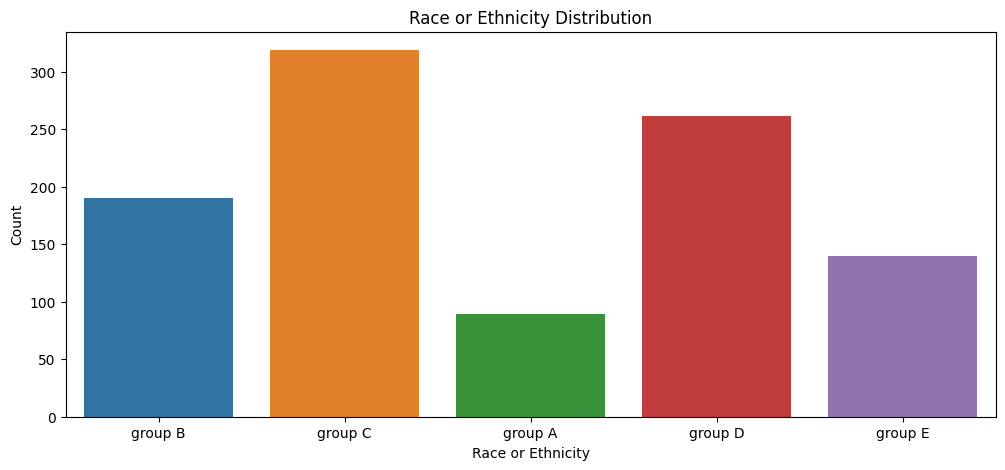

In [ ]:
# Race/Ethnicity Figure
plt.figure(figsize = (12, 5))
sns.countplot(data = df,
              x = 'race/ethnicity',
              hue = 'race/ethnicity')
plt.title('Race or Ethnicity Distribution')
plt.xlabel('Race or Ethnicity')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

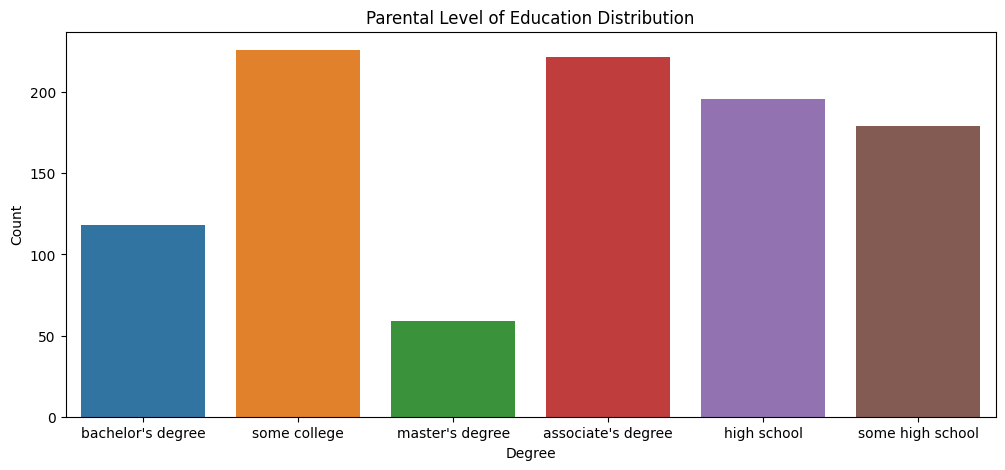

In [ ]:
# Parental Level of Education Figure
plt.figure(figsize = (12, 5))
sns.countplot(data = df,
              x = 'parental level of education',
              hue = 'parental level of education')
plt.title('Parental Level of Education Distribution')
plt.xlabel('Degree')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

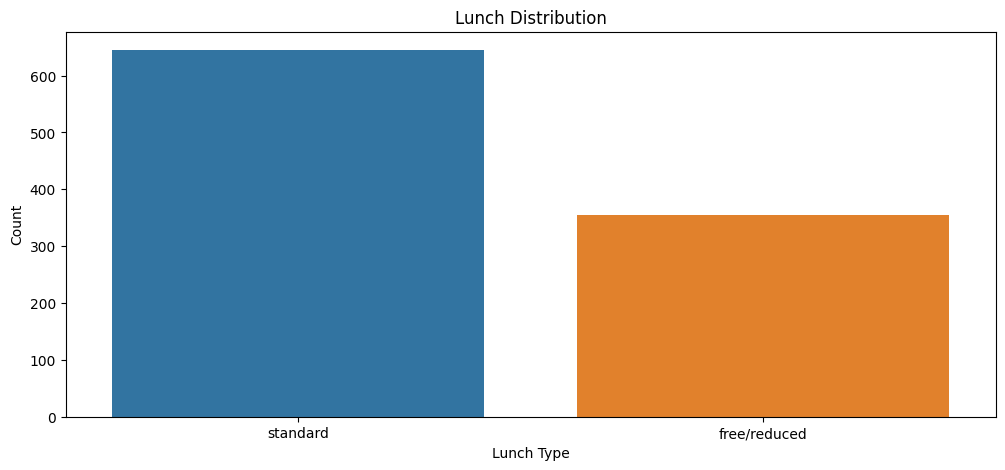

In [ ]:
# Lunch Figure
plt.figure(figsize = (12, 5))
sns.countplot(data = df,
              x = 'lunch',
              hue = 'lunch')
plt.title('Lunch Distribution')
plt.xlabel('Lunch Type')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

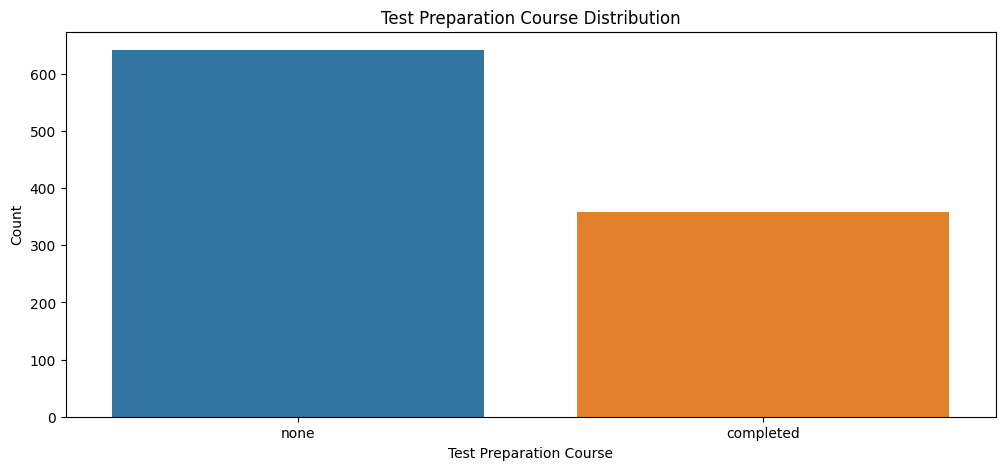

In [ ]:
# Test Preparation Course Figure
plt.figure(figsize = (12, 5))
sns.countplot(data = df,
              x = 'test preparation course',
              hue = 'test preparation course')
plt.title('Test Preparation Course Distribution')
plt.xlabel('Test Preparation Course')
plt.ylabel('Count')

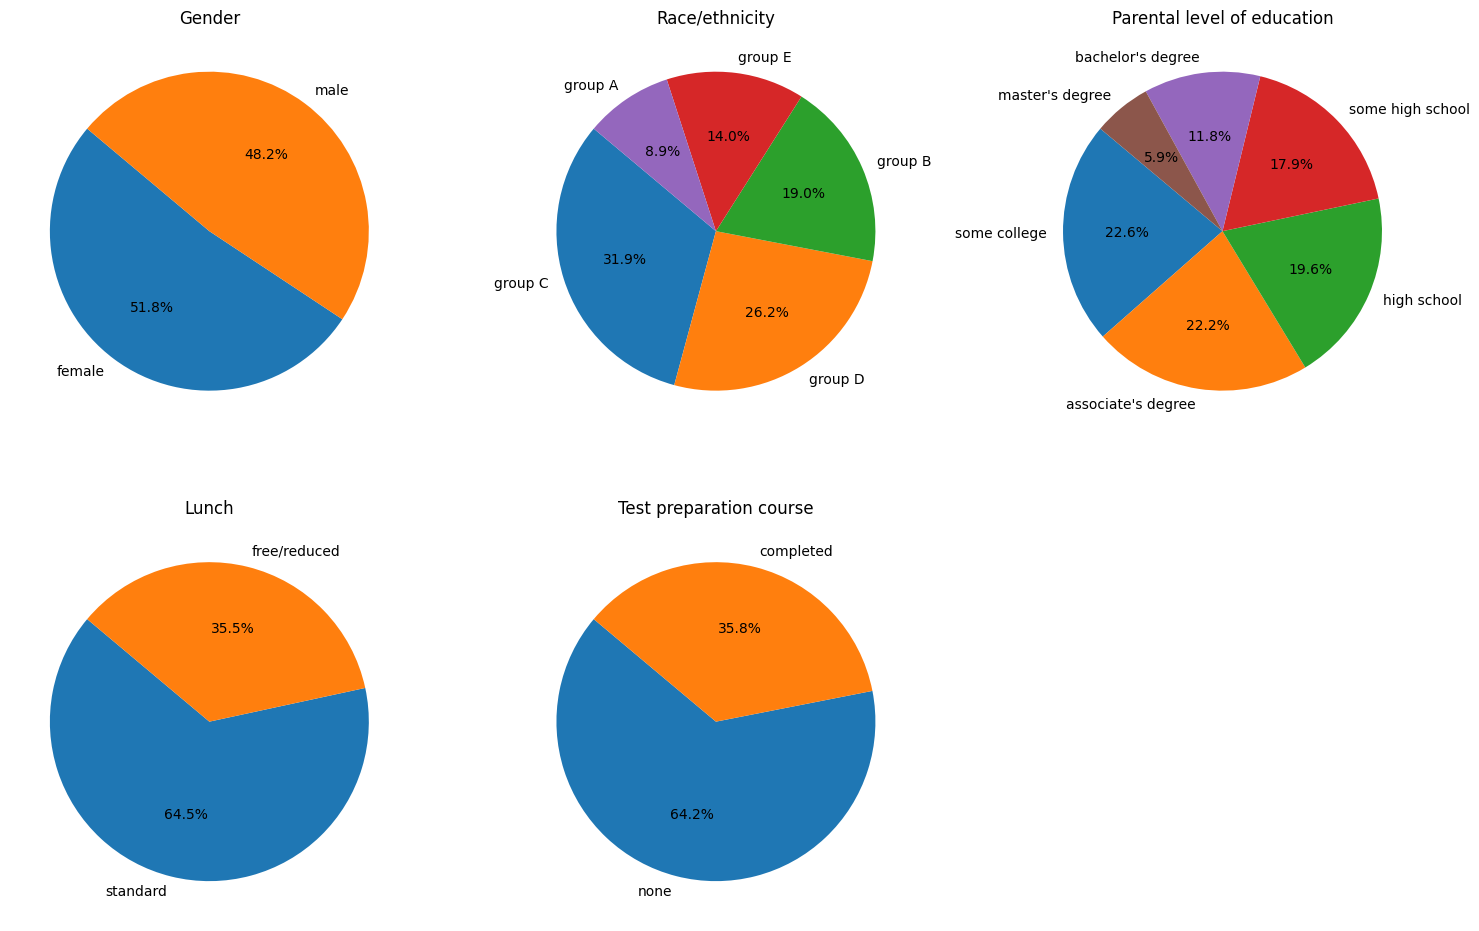

In [ ]:
# Extarct numeric adn categorical features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


# Define the columns for multivariate analysis
columns_for_analysis = categorical_cols

# Define the number of rows and columns for subplots
num_plots = len(columns_for_analysis)
num_cols = 3
num_rows = (num_plots // num_cols) + (1 if num_plots % num_cols > 0 else 0)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array to iterate over subplots
axes = axes.flatten()

# Iterate over columns for analysis and create pie plots
for i, column in enumerate(columns_for_analysis):
    # Get the value counts for the column
    value_counts = df[column].value_counts()

    # Plot the pie chart
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(column.capitalize())  # Set subplot title

# Hide empty subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

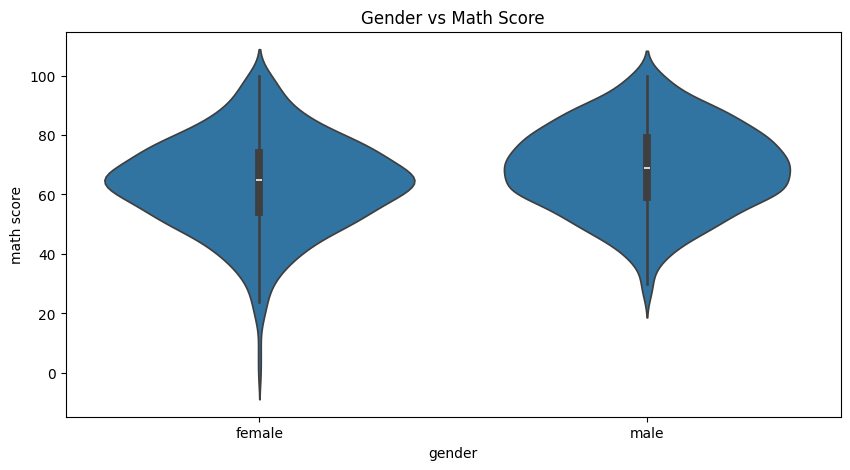

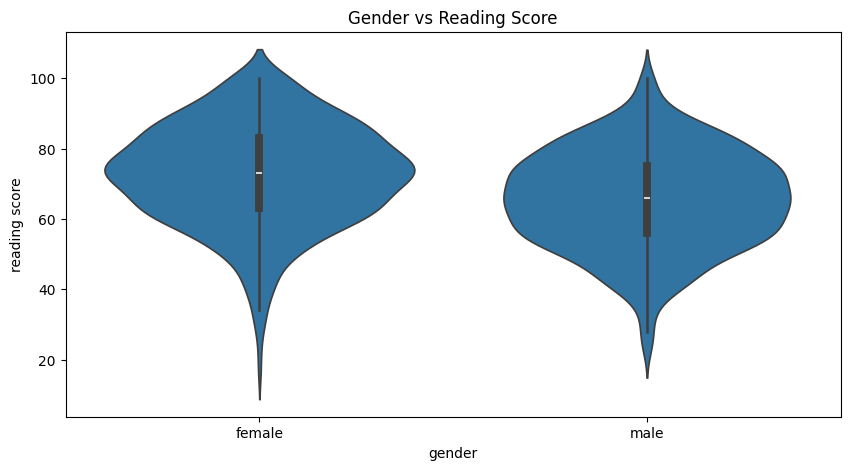

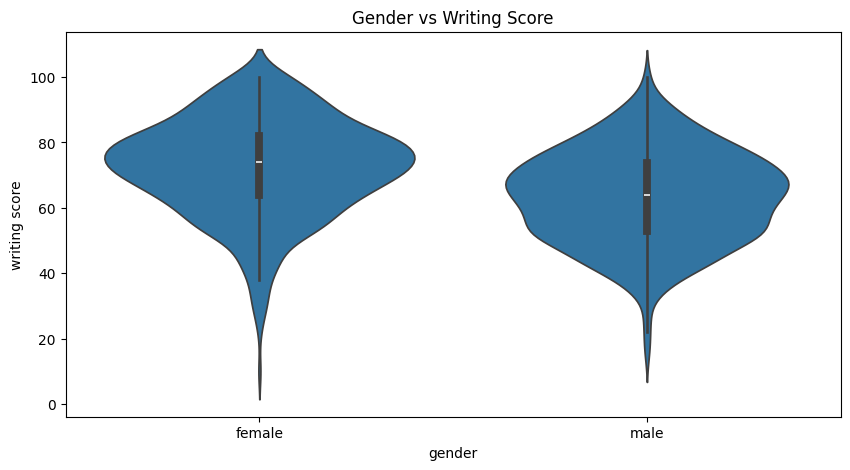

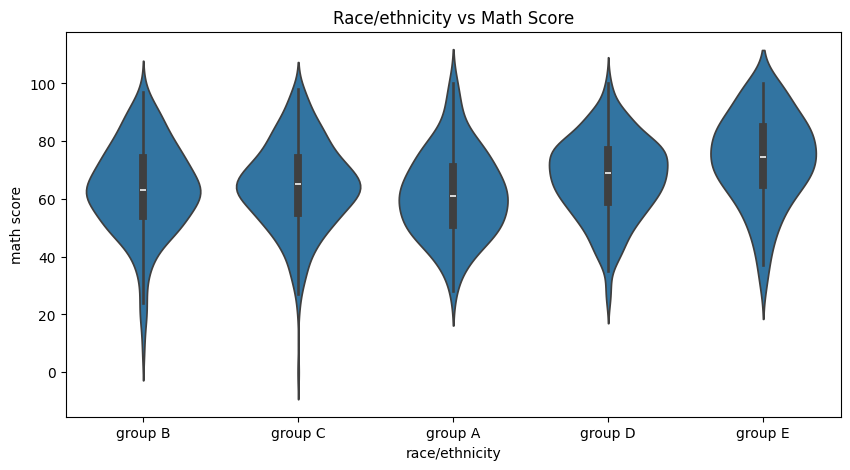

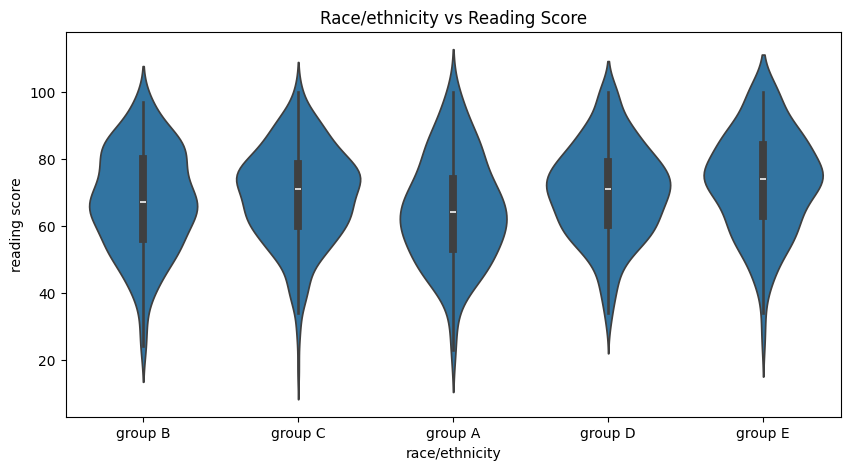

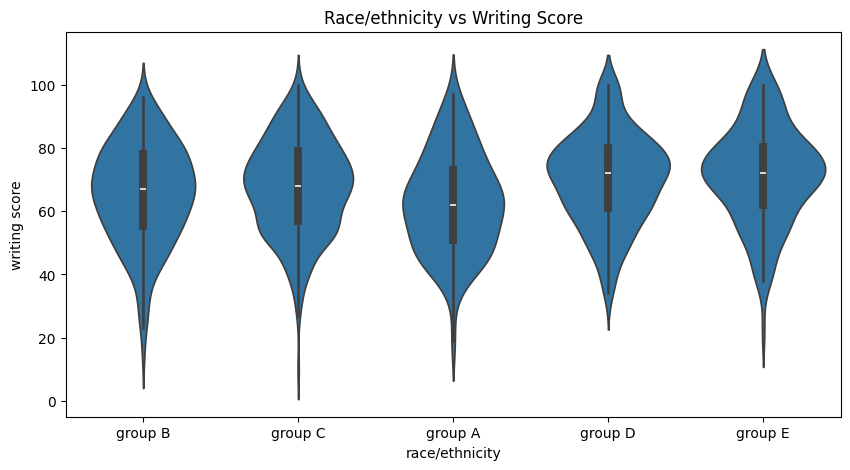

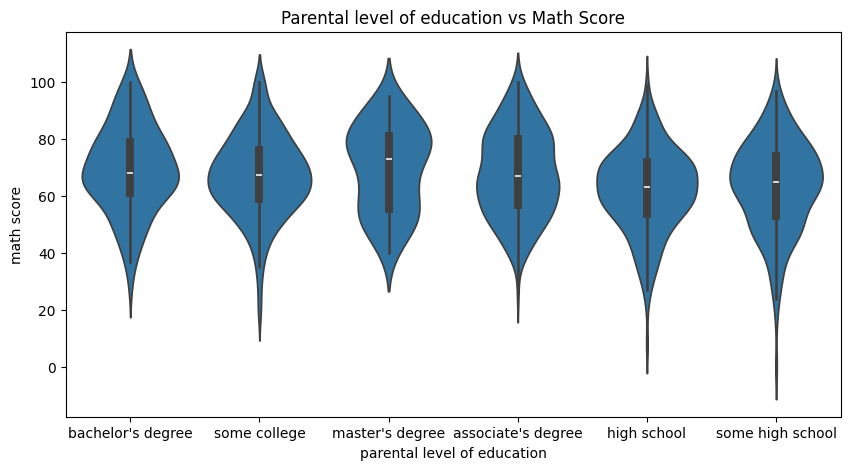

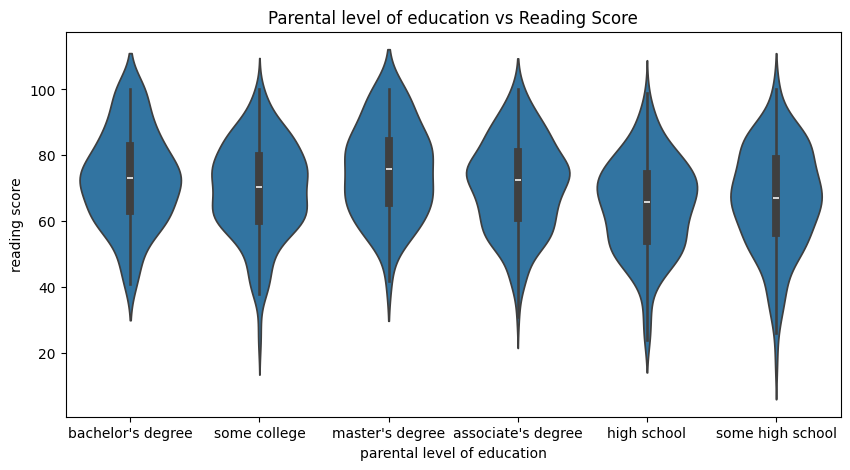

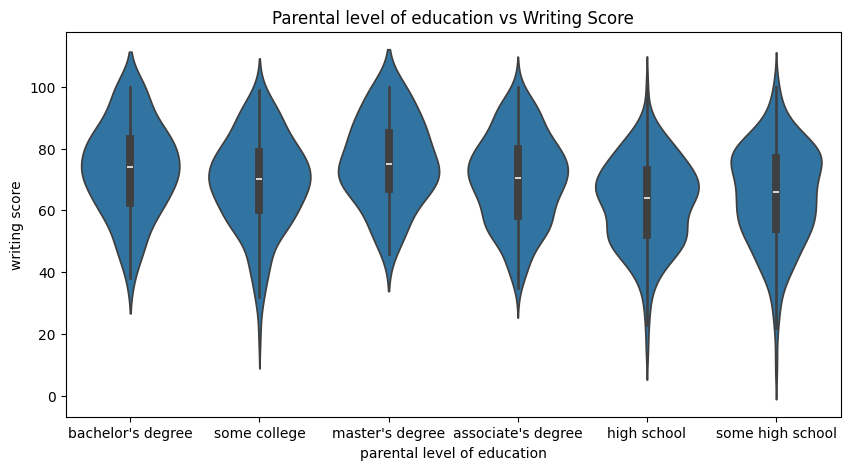

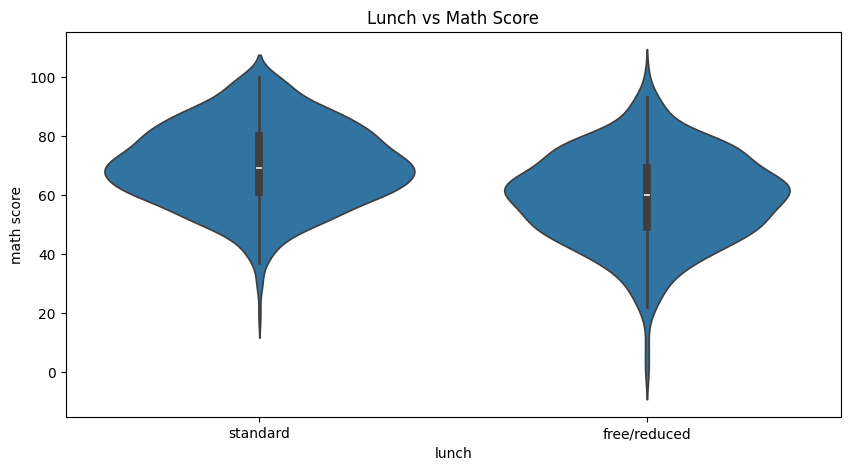

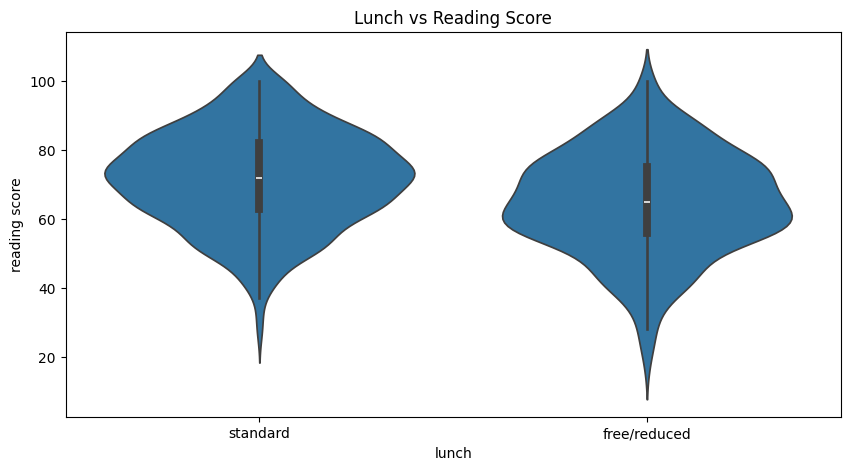

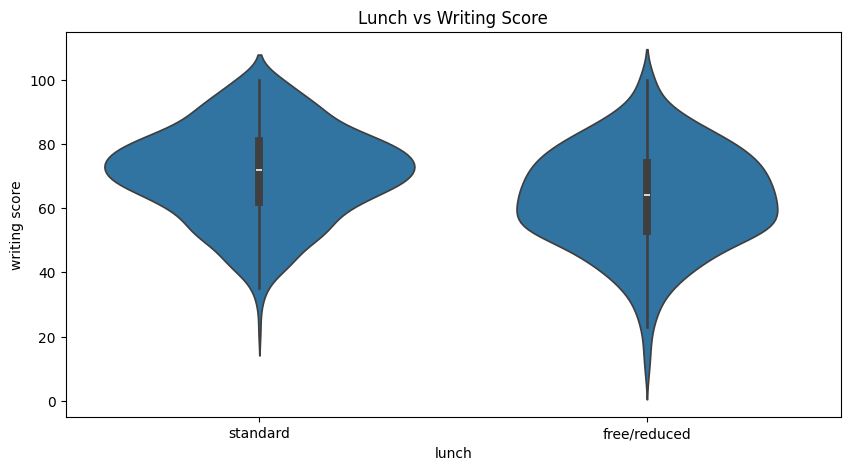

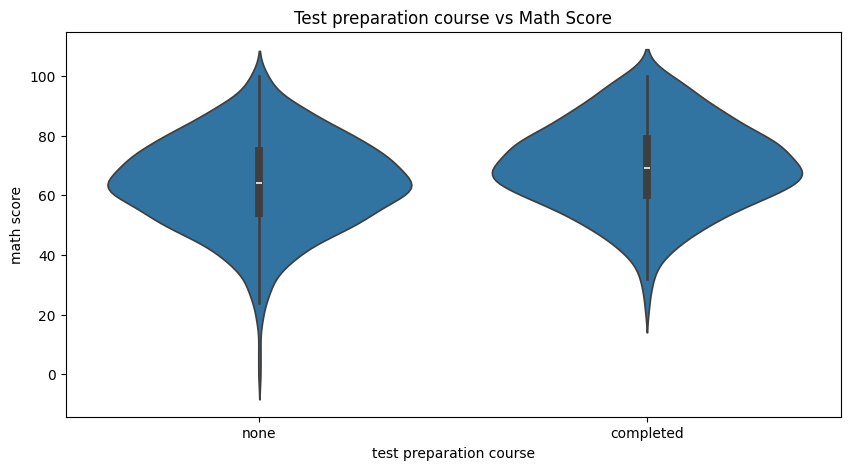

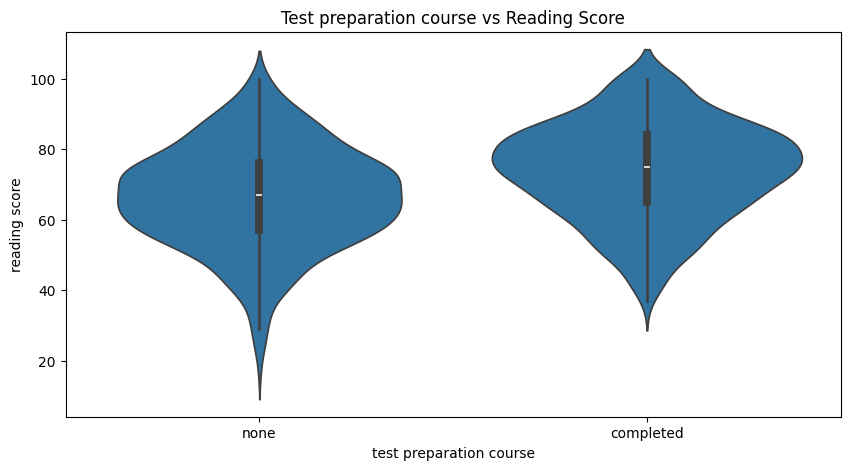

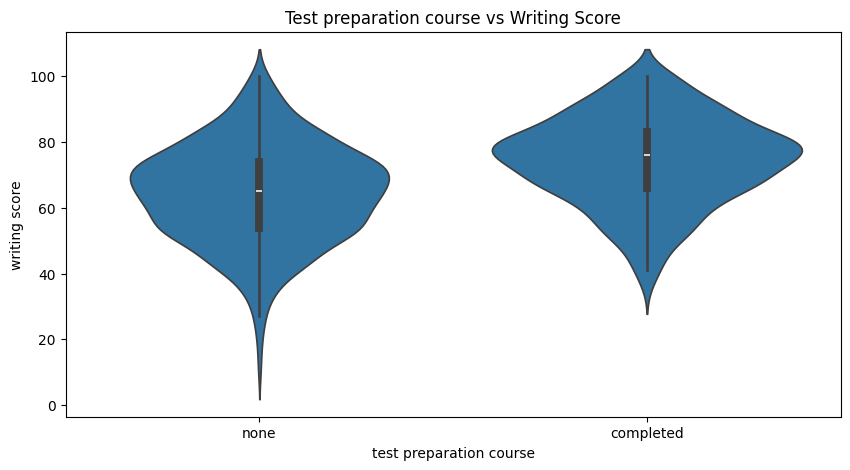

In [ ]:
# Loop through each categorical variable
for feature in categorical_cols:
    # Create a box plot for each test score (math, reading, writing) against the current categorical variable
    plt.figure(figsize=(10, 5))
    sns.violinplot(x=feature, y='math score', data=df)
    plt.title(f'{feature.capitalize()} vs Math Score')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.violinplot(x=feature, y='reading score', data=df)
    plt.title(f'{feature.capitalize()} vs Reading Score')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.violinplot(x=feature, y='writing score', data=df)
    plt.title(f'{feature.capitalize()} vs Writing Score')
    plt.show()


## **Key Findings and Business Impact**

In the context of predictive modeling, MSE (Mean Squared Error) and R-squared (R2) are commonly used metrics to evaluate the performance of a model.

Mean Squared Error (MSE):

* MSE measures the average squared difference between the actual values (observed) and the predicted values (estimated) by the model.
It quantifies the overall quality of predictions made by the model.
Lower values of MSE indicate better predictive performance, as they reflect smaller errors between predicted and actual values.

R-squared (R2):

* R2 represents the proportion of variance in the dependent variable (target) that is explained by the independent variables (features) in the model.
It ranges from 0 to 1, where:
R2 = 0 indicates that the model does not explain any variability in the target variable.
R2 = 1 indicates that the model perfectly explains the variability in the target variable.
Higher values of R2 indicate better fit of the model to the data, suggesting that the independent variables are effective in explaining variation in the dependent variable.

---

EVALUATION (MATH SCORE):

Linear Regression:
MSE: 29.0951698667155
R2: 0.8804332983749564

Ridge Regression:
MSE: 29.056272192348306
R2: 0.8805931485028737

Lasso Regression:
MSE: 28.821317118777714
R2: 0.8815586971937939

Random Forest Regressor:
MSE: 36.212491241850906
R2: 0.8511846414628726

AdaBoost Regressor:
MSE: 44.86818271598988
R2: 0.8156140472856324

---

EVALUATIONS (READING SCORE):

Linear Regression:
MSE: 18.378046875
R2: 0.9187834030741185

Ridge Regression:
MSE: 18.51373445853214
R2: 0.9181837700524743

Lasso Regression:
MSE: 18.723078110804213
R2: 0.9172586348005504

Random Forest Regressor:
MSE: 20.5123235
R2: 0.9093515692367182

AdaBoost Regressor:
MSE: 24.23550121503363
R2: 0.8928980349834865

---

EVALUATIONS (WRITING SCORE):

Linear Regression:
MSE: 14.94494140625
R2: 0.937992162559297

Ridge Regression:
MSE: 14.9086590225526
R2: 0.9381427012659478

Lasso Regression:
MSE: 15.23246410824539
R2: 0.9367992063287435

Random Forest Regressor:
MSE: 20.382918513168935
R2: 0.9154295314130096

AdaBoost Regressor:
MSE: 27.422427780826837
R2: 0.886222006641537

---

Findings:

•	Linear Models (Linear Regression, Ridge Regression, Lasso Regression) consistently performed better than Non-Linear Models (Random Forest Regressor, AdaBoost Regressor) across all three score evaluations (math, reading, and writing).

•	Among the linear models, Lasso Regression slightly outperformed the others for math scores, Linear Regression was best for reading scores, and Ridge Regression was best for writing scores.

•	Random Forest Regressor and AdaBoost Regressor consistently showed higher prediction errors (higher MSE) and less explained variance (lower R2), making them less effective for these datasets.

## **Advanced Analysis**

### Feature Importance Analysis

In [ ]:
numeric_columns = df.select_dtypes(exclude="object").columns.tolist()
categorical_columns = df.select_dtypes(include="object").columns.tolist()

# Separate features (X) and target (Y)
X = df.drop(numeric_columns, axis=1)
Y = df[numeric_columns]

# Define categorical columns
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

print('TOP 3 FEATURES FOR EACH NUMERICAL COLUMNS:\n')

# Fit the Random Forest model separately for each target
for pred in numeric_columns:
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_processed, Y[pred])

    # Get feature importances
    importances = rf.feature_importances_
    feature_names = preprocessor.get_feature_names_out()
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    print(f"Feature importances for target: {pred}")
    print(feature_importance_df[:3])
    print()


TOP 3 FEATURES FOR EACH NUMERICAL COLUMNS:

Feature importances for target: math score
                              Feature  Importance
10                cat__lunch_standard    0.251985
0                    cat__gender_male    0.101750
11  cat__test preparation course_none    0.097606

Feature importances for target: reading score
                              Feature  Importance
0                    cat__gender_male    0.149607
10                cat__lunch_standard    0.132030
11  cat__test preparation course_none    0.131719

Feature importances for target: writing score
                              Feature  Importance
11  cat__test preparation course_none    0.184364
0                    cat__gender_male    0.182394
10                cat__lunch_standard    0.140031



## **Implementation of Machine Learning**

### Fitting the Models (using Linear Regression, Ridge, Lasso, Random Forest Regressor, and Ada Boost Regressor)

In [ ]:
# Initialize and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Initialize and fit the Ridge model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value
ridge_model.fit(X_train, y_train)

# Initialize and fit the Lasso model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value
lasso_model.fit(X_train, y_train)

# Initialize and fit the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Initialize and fit the AdaBoost Regressor
adaboost_model = AdaBoostRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
adaboost_model.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.1, random_state=42)

### Making Predictions

In [ ]:
# Make predictions
y_test_pred_linear = linear_model.predict(X_test)
y_test_pred_ridge = ridge_model.predict(X_test)
y_test_pred_lasso = lasso_model.predict(X_test)
y_test_pred_rf = rf_model.predict(X_test)
y_test_pred_adaboost = adaboost_model.predict(X_test)

### Mean Squared Error

In [ ]:
# Evaluate models
mse_linear = mean_squared_error(y_test, y_test_pred_linear)
r2_linear = r2_score(y_test, y_test_pred_linear)

mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_ridge = r2_score(y_test, y_test_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2_lasso = r2_score(y_test, y_test_pred_lasso)

mse_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_rf = r2_score(y_test, y_test_pred_rf)

mse_adaboost = mean_squared_error(y_test, y_test_pred_adaboost)
r2_adaboost = r2_score(y_test, y_test_pred_adaboost)

print("Linear Regression:")
print("MSE:", mse_linear)
print("R2:", r2_linear)

print("\nRidge Regression:")
print("MSE:", mse_ridge)
print("R2:", r2_ridge)

print("\nLasso Regression:")
print("MSE:", mse_lasso)
print("R2:", r2_lasso)

print("\nRandom Forest Regressor:")
print("MSE:", mse_rf)
print("R2:", r2_rf)

print("\nAdaBoost Regressor:")
print("MSE:", mse_adaboost)
print("R2:", r2_adaboost)

Linear Regression:
MSE: 14.94494140625
R2: 0.937992162559297

Ridge Regression:
MSE: 14.9086590225526
R2: 0.9381427012659478

Lasso Regression:
MSE: 15.23246410824539
R2: 0.9367992063287435

Random Forest Regressor:
MSE: 20.382918513168935
R2: 0.9154295314130096

AdaBoost Regressor:
MSE: 27.422427780826837
R2: 0.886222006641537


### Plot Actual vs. Predicted Values for each Model

In [ ]:
# Plot actual vs predicted values
def plot_actual_pred(actual, pred, model):
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=actual, y=pred, label='Actual vs Predicted')
  plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], color='red', linestyle='--', label='Perfect Prediction')
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title(f'Actual vs Predicted Test Scores using {model}')
  plt.legend()
  plt.grid(True)
  plt.show()


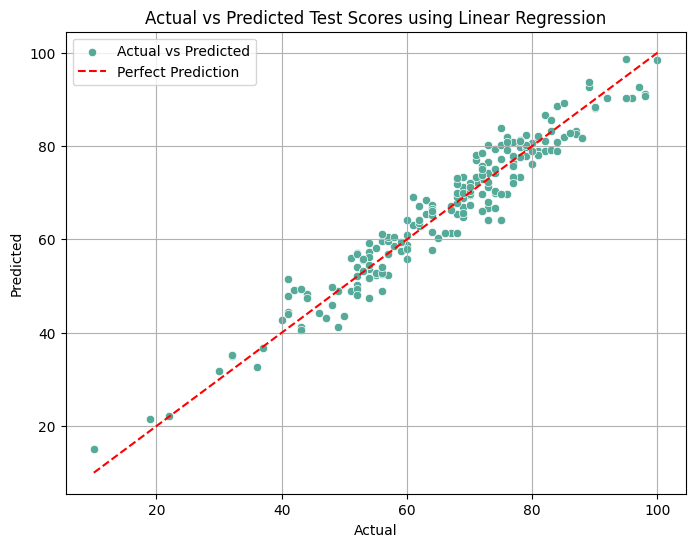

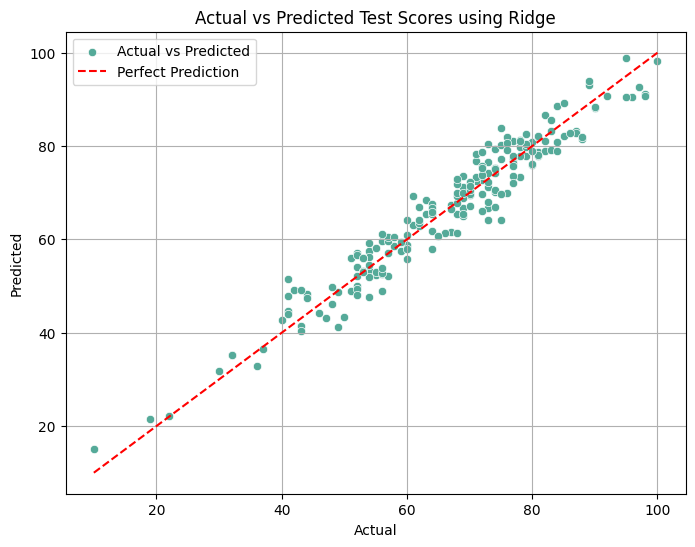

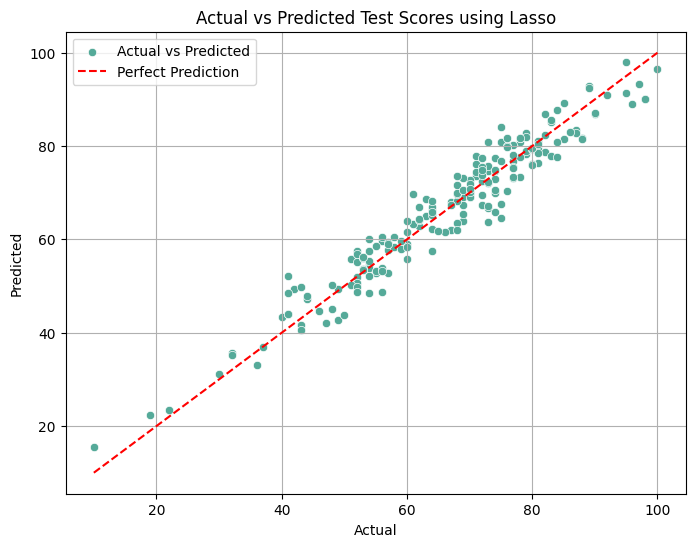

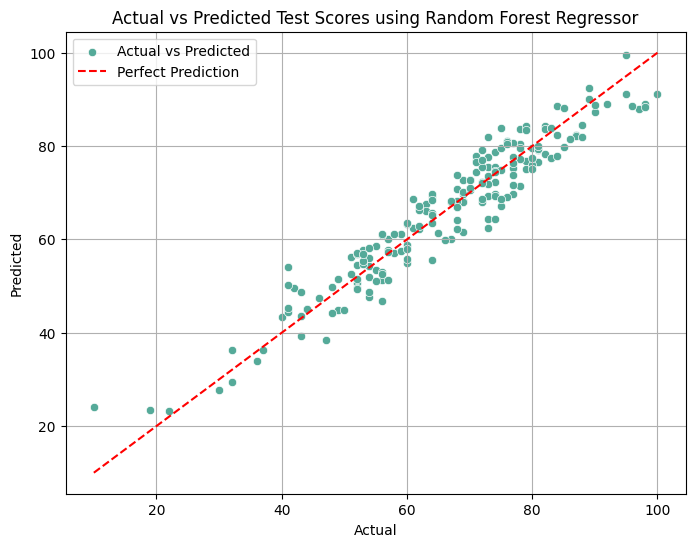

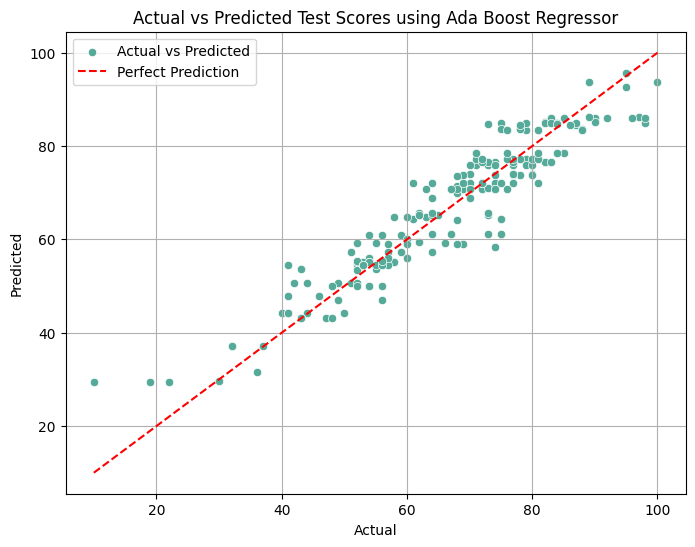

In [ ]:
models = ['Linear Regression', 'Ridge', 'Lasso', 'Random Forest Regressor', 'Ada Boost Regressor']
pred = [y_test_pred_linear, y_test_pred_ridge, y_test_pred_lasso, y_test_pred_rf, y_test_pred_adaboost]

for pred, model in zip(pred, models):
    plot_actual_pred(y_test, pred, model)

## **Conclusion**

The analysis of the student performance dataset produced several important discoveries. According to descriptive statistics, the dataset has 1000 records, with comprehensive data on various performance and demographic characteristics. Significant variations in test preparation, lunch type, parental education, gender, and race/ethnicity were found using inferential statistics. Particularly, performance varied across racial and cultural groups, although males and females showed variations in math and writing scores. Higher parental education levels have been linked to improved student performance; test-preparation course completion and standard lunch recipients typically yielded higher scores. With high R2 values and low MSE, predictive modeling employing ridge regression, lasso regression, random forest regressor, and AdaBoost regressor revealed that ridge regression and linear regression were the most successful models. The most significant predictors of the three subject examination scores were found to be gender, lunch, and test preparation course completion by feature importance analysis. Score distributions and demographic characteristics were made more evident by visual aids such as violin plots, bar charts, and histograms.

The analysis concludes by highlighting the critical influence that socioeconomic and demographic factors have on student achievement. Several focused recommendations are made to improve educational outcomes. First, creating educational programs tailored to the unique learning preferences and needs of male and female students helps promote a more welcoming and productive learning environment. Second, by making the material more interesting and relevant for all students, the use of culturally responsive teaching practices can aid in closing the achievement gap between various racial and ethnic groups. Fostering parental involvement via workshops and resources can enable parents to support their kids' education better, strengthening the bond between the home and the school.

Furthermore, it is critical to guarantee that all kids have access to sustaining meals because a healthy diet is associated with improved focus and general academic success. Encouraging and offering easily accessible test-taking programs can help level the playing field by equipping all students with the skills they need to achieve. By putting in place mechanisms for ongoing observation and support of student performance, problems can be quickly identified and resolved, guaranteeing that students have the support they require to succeed. Policymakers should consider these findings when developing inclusive and equitable educational programs. By addressing these areas, educational institutions can help all students reach their full academic potential and create a more equal and encouraging learning environment.
